# Traffic Sign Image Classification

# Import Libraries

In [154]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

# Get training data path

In [155]:
train_img_paths=[]
train_labels=[]
p = 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset'
for i in os.listdir(p):
    print(i)
    print(os.path.join(p,i))
    
    with open(os.path.join(p,i,"train.txt")) as file:
        
        for each_line in file:
            train_img_paths.append(os.path.join(p,i,each_line.strip()))
            train_labels.append(i)
        

00001
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00001
00002
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00002
00003
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00003
00004
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00004
00005
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00005
00006
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00006
00007
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00007
00008
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00008
00009
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00009
00010
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00010


In [156]:
train_img_paths

['C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00468_00002.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00475_00000.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00475_00001.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00475_00002.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00801_00000.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00801_00001.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00801_00002.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00806_00000.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00806_00001.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00806_00002.ppm',
 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset\\00001\\00874_00000.ppm',

# Training_Images

In [157]:
img_width=20
img_height=20
dim= (img_width,img_height)
train_images = []
for imgpath in train_img_paths:
    image = cv2.imread(imgpath,0)
    image = cv2.resize(image,dim)
    train_images.append(image)
train_images=np.array(train_images)

In [158]:
len(train_images)

800

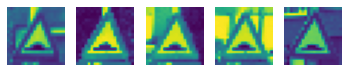

Training label: ['00001', '00001', '00001', '00001', '00001']


In [159]:
'''Plot first 5 images of training images'''
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()
print('Training label: %s' % (train_labels[0:5],))

# Histogram of Gradient

In [160]:
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
#ignedGradients = True

 

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,
                        L2HysThreshold,gammaCorrection,nlevels)


In [161]:
'''Compute the feature vectors for each of training images'''
descriptor=[]
for item in train_images:
    descriptor.append(hog.compute(item))
    


In [162]:
np.array(descriptor).shape

(800, 81, 1)

In [163]:
'''Reshape'''
nsamples, nx, ny = np.array(descriptor).shape
train_data = np.array(descriptor).reshape((nsamples,nx*ny))
train_data.shape

(800, 81)

# Test Data

In [164]:
'''Get the path from text files'''
test_img_paths=[]
label_test= []
pa = 'C:\\Users\\Tasleem Zahra\\Downloads\\CS67_Fall2022_ A1_Dataset'
for j in os.listdir(pa):
    print(j)
    print(os.path.join(pa,j))
    
    with open(os.path.join(p,j,"test.txt")) as f:
        
        for item in f:
            test_img_paths.append(os.path.join(pa,j,item.strip()))
            label_test.append(j)
        

00001
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00001
00002
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00002
00003
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00003
00004
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00004
00005
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00005
00006
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00006
00007
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00007
00008
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00008
00009
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00009
00010
C:\Users\Tasleem Zahra\Downloads\CS67_Fall2022_ A1_Dataset\00010


In [165]:
'''Get the test images in list'''
test_images = []
for imgpath1 in test_img_paths:
    test_image = cv2.imread(imgpath1,0)
    test_image =cv2.resize(test_image,(20,20))
    test_images.append(test_image)
test_images=np.array(test_images)

In [166]:
len(test_images)

200

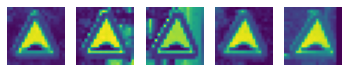

Testing label: ['00001', '00001', '00001', '00001', '00001']


In [167]:
'''Plot first 5 test images'''
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()
print('Testing label: %s' % (label_test[0:5],))

In [168]:
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
#signedGradients = True

 

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,
                        L2HysThreshold,gammaCorrection,nlevels)


In [169]:
'''Compute the feature vectors for all the test images'''
descriptor_test=[]
for i in test_images:
    descriptor_test.append(hog.compute(i))


In [170]:
np.array(descriptor_test).shape

(200, 81, 1)

In [171]:
'''Reshape'''
nsample, ns, nt = np.array(descriptor_test).shape
test_data = np.array(descriptor_test).reshape((nsample,ns*nt))
test_data.shape

(200, 81)

# Support Vector Machine

In [172]:
'''Fit model on feature vectors of training images and training labels'''
from sklearn.svm import LinearSVC
# load linear SVM
modelSVC = LinearSVC(max_iter=3000)
modelSVC.fit(train_data, train_labels)
print("SVC training completed")

SVC training completed


In [173]:
'''Prediction on feature vectors of test images'''
predicted_labels = modelSVC.predict(test_data)

In [174]:
'''Check whether they predict the good'''
print(predicted_labels[0:10])
print(label_test[0:10])

['00001' '00001' '00001' '00001' '00001' '00001' '00004' '00004' '00001'
 '00004']
['00001', '00001', '00001', '00001', '00001', '00001', '00001', '00001', '00001', '00001']


# Accuracy

In [175]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(label_test, predicted_labels))

Accuracy: 0.9


In [176]:
'''Confusion Matrix,Classification Report'''
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(label_test, predicted_labels))


              precision    recall  f1-score   support

       00001       1.00      0.75      0.86        20
       00002       0.90      0.90      0.90        20
       00003       0.83      0.75      0.79        20
       00004       0.80      1.00      0.89        20
       00005       1.00      1.00      1.00        20
       00006       1.00      1.00      1.00        20
       00007       0.90      0.95      0.93        20
       00008       0.83      0.75      0.79        20
       00009       0.86      0.90      0.88        20
       00010       0.91      1.00      0.95        20

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [177]:
'''Confusion Matrix'''
cm=confusion_matrix(label_test, predicted_labels)
cm

array([[15,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 15,  0,  0,  0,  2,  2,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  3,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [178]:
'''Calculate false positive,false negative,true positive'''
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

In [179]:
print(TPR)

[0.75 0.9  0.75 1.   1.   1.   0.95 0.75 0.9  1.  ]


In [180]:
'''Precision'''
PPV = TP/(TP+FP)

In [181]:
'''False Negative Rate'''
FNR = FN/(TP+FN)
print(FNR)

[0.25 0.1  0.25 0.   0.   0.   0.05 0.25 0.1  0.  ]


In [182]:
'''False discovery rate'''
print(FDR)

[0.         0.1        0.16666667 0.2        0.         0.
 0.0952381  0.16666667 0.14285714 0.09090909]


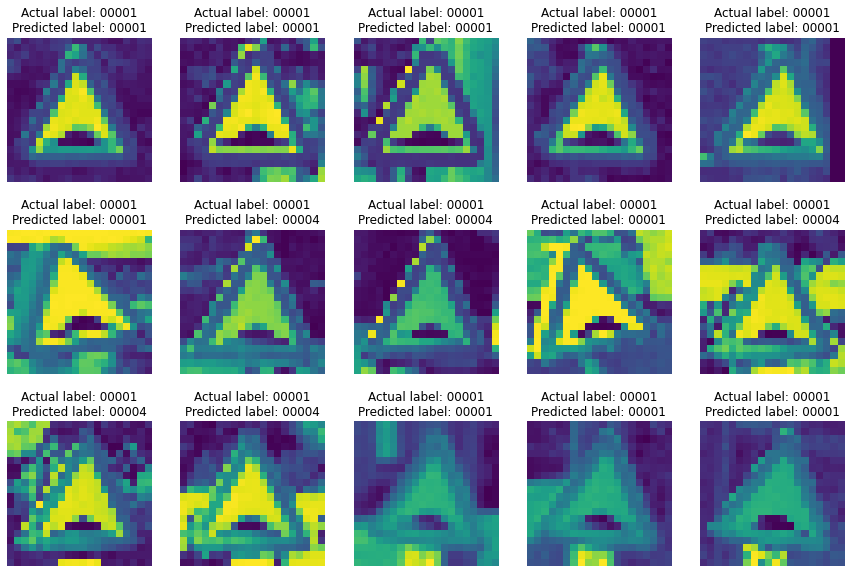

In [183]:
plt.figure(figsize=(15,10))
for i in range(15):
    ax = plt.subplot(3,5,i+1)
    plt.imshow(test_images[i])
    plt.title(f'Actual label: {label_test[i]}\nPredicted label: {predicted_labels[i]}')
    plt.axis('off')
plt.savefig('Predictions')
plt.show() 
# print('Training label: %s' % (train_labels[0:5],))

# Unsupervised

In [143]:
data= train_data

In [144]:
from sklearn.datasets import make_blobs
data, train_labels = make_blobs(n_samples=800, centers=10,
                       cluster_std=0.60, random_state=0)

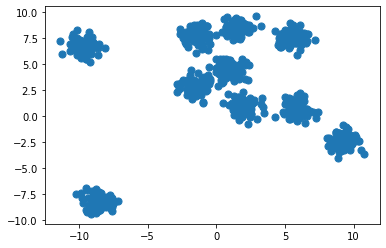

In [146]:
plt.scatter(data[:, 0], data[:, 1], s=50)

In [ ]:
'''Get the int labels of test data'''
label_tst = []

for i in label_test:
    label_tst.append(int(i))

In [152]:
'''KMEANS'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(train_data)
y_kmeans = kmeans.predict(test_data)

In [153]:
'''Accuracy'''
print("Accuracy:",metrics.accuracy_score(label_tst, y_kmeans))

Accuracy: 0.17
